## Explore American Fast Food Restaurants Data
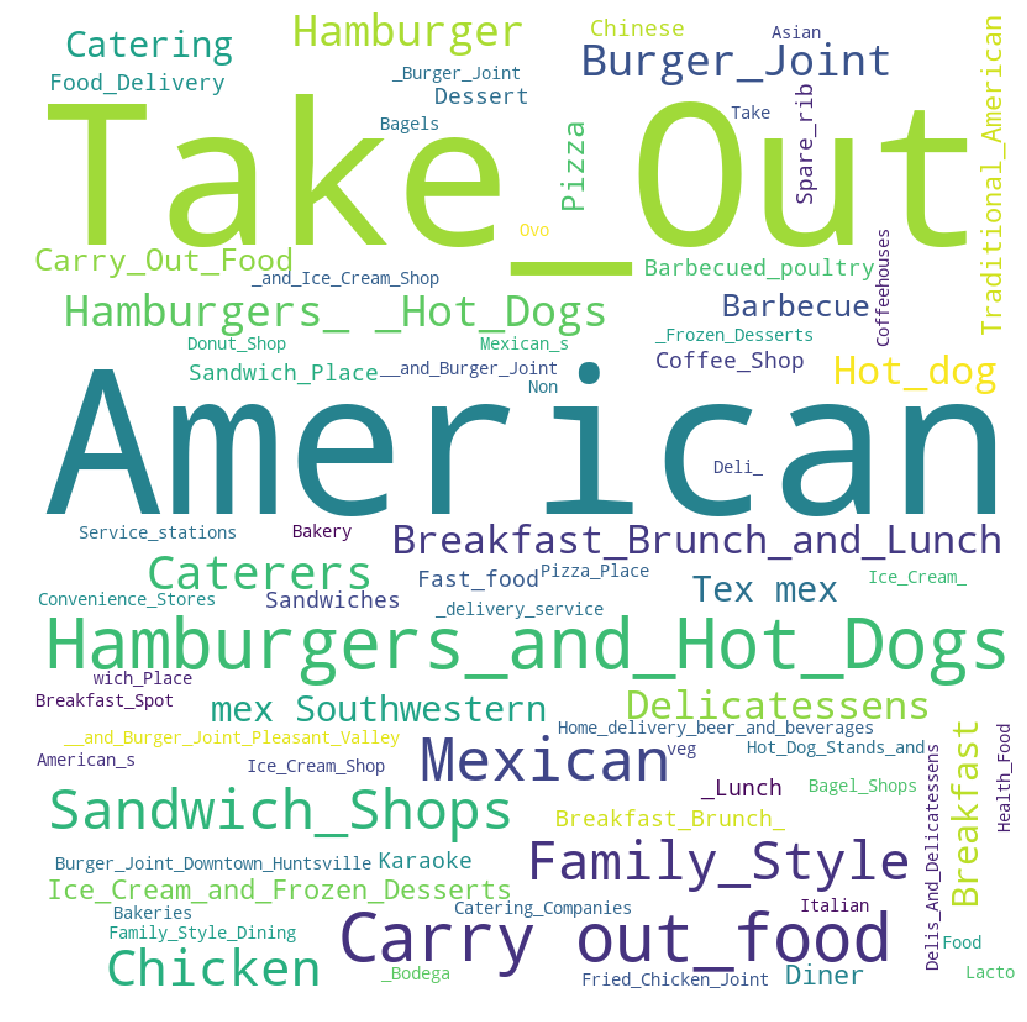

#### The above word cloud is generated by the Fast Food Dataset and plotted by wordCloud package with Python

## Table of Contents:
[Packages User](#Packages-used) 

[1. Input Dataset](#1.-Let's-input-dataset-first) 

[2. Take a peek at the data](#2.-Let's-take-a-peek-at-what-we-have)

[3. Let's check do we have missing data](#3.-Let's-drop-id,-keys,-sourceURLs,-and-websites-first)

[4. Let's drop id, keys, sourceURLs, and websites first](#3.-Let's-drop-id,-keys,-sourceURLs,-and-websites-first)

[5. Restarant Names Exploration and Visualizations:](#5.-Restarant-Names-Exploration-and-Visualizations:)

[6. NLP: More data cleaning](#Questions-6:-What-are-the-proportions-of-different-fast-food-restaurants-in-top-3-mentioned-cities?)

[7. Explore the food categories and visualize them](#Question-7:-What's-the-geospatial-perspective-of-the-restaurants-in-differnt-states?)

[8. Let's explore the location data of given dataset](#Question-8:-How-are-the-fast-food-restaurants-scattered?)

[9. Ratio between restaurants opened and population](#9.-Ratio-between-fast-food-restaurants-opened-and-population)


### If you like this kernel, please give me an Up Vote on top by clicking the up arrow.
### Below are my super detailed exploratory data analysis with visualizations.
## Packages used: 
#### 1. Data manipulation: numpy, pandas, datetime, dateutil.parser
#### 2. Visualization: matplotlib, plotly, wordcloud
#### 3. Natural Language Processing(NLP): NLTK

### Data is collected from 2014 to May 2019.

In [244]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# check we have for the input dataset
print(os.listdir("../input"))

['us2letterstatecodecsv', 'fast-food-restaurants', 'us-census-2017']


## 1. Let's input dataset first

In [245]:
# "...may19.csv" is the latest one
fastfood_data = pd.read_csv('../input/fast-food-restaurants/Datafiniti_Fast_Food_Restaurants_May19.csv')

## 2. Let's take a peek at what we have[](http://)

In [246]:
# shape of dataset
print("Dataset dimension:")
print(fastfood_data.shape)

Dataset dimension:
(10000, 16)


In [247]:
# check the data type of the columns
print("Data types:")
print(fastfood_data.dtypes)

Data types:
id                    object
dateAdded             object
dateUpdated           object
address               object
categories            object
primaryCategories     object
city                  object
country               object
keys                  object
latitude             float64
longitude            float64
name                  object
postalCode            object
province              object
sourceURLs            object
websites              object
dtype: object


In [248]:
# take a peek
print("Top 10 rows:")
fastfood_data.head(10)

Top 10 rows:


,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.396290,-104.696990,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/car...,https://www.carlsjr.com/?utm_source=Yextandutm...
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.081350,-108.586890,Del Taco,81505,CO,http://www.citysearch.com/profile/772076870/gr...,http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.091480,-108.554110,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/...,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.763690,-104.776710,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chip...,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.740440,-104.926360,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco...,https://locations.tacobell.com/co/denver/5225-...
5,AWrSaQ5RZ4Yw-wtdgcZw,2019-05-19T23:24:21Z,2019-05-19T23:24:21Z,1350 W Colfax Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Denver,US,us/co/denver/1350wcolfaxavenue/-1161002137,39.739670,-105.004670,McDonald's,80204,CO,https://www.yellowpages.com/denver-co/mip/mcdo...,https://www.mcdonalds.com/us/en-us/location/CO...
6,AWrSaQ4EsVYjT2BJAy_I,2019-05-19T23:24:21Z,2019-05-19T23:24:21Z,200 16th Street,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Denver,US,us/co/denver/20016thstreet/-1161002137,39.741700,-104.988290,McDonald's,80202,CO,https://www.yellowpages.com/denver-co/mip/mcdo...,https://www.mcdonalds.com/us/en-us/location/CO...
7,AWCvDUHSIxWefVJwvq4y,2018-01-01T00:01:02Z,2019-05-19T22:58:35Z,1772 N College Ave,"Restaurant,Carry-out food,Mexican Restaurants,...",Accommodation & Food Services,Fayetteville,US,us/ar/fayetteville/1772ncollegeave/-864103396,36.085369,-94.155319,Taco Bell,72703,AR,http://www.insiderpages.com/b/3709775090/taco-...,"http://www.tacobell.com/,http://www.tacobell.com"
8,AWrSTT3sQTFama1Xpjyq,2019-05-19T22:53:58Z,2019-05-19T22:53:58Z,605 S Havana Street,"Fast Food Restaurants,American Restaurants,Fam...",Accommodation & Food Services,Aurora,US,us/co/aurora/605shavanastreet/1077717834,39.705340,-104.866330,Captain D's Seafood Kitchen,80012,CO,https://www.yellowpages.com/denver-co/mip/capt...,http://www.captainds.com
9,AWkq412CIxWefVJwH_cO,2019-02-26T17:18:51Z,2019-05-19T22:51:18Z,16th Glenarm Place,"Mexican Restaurants,Caterers,Greek Restaurants...",Accommodation & Food Services,Denver,US,us/co/denver/16thglenarmplace/2067027233,39.749107,-104.994590,Shondiz,80202,CO,https://www.yellowpages.com/denver-co/mip/shon...,"http://www.shondiz.com,http://www.shondiz.com/"


## 3. Let's drop id, keys, sourceURLs, and websites first

In [249]:
# the id, keys, sourceURLs, and websites are unique identifier
# we don't need them in our visualizations
fastfood_data = fastfood_data.drop(['id', 'keys', 'sourceURLs', 'websites'], axis=1)

# shape of dataset
print("Dimension after dropping columns:")
print(fastfood_data.shape)

# take a peek at the head to verify the drop is successful
fastfood_data.head()

Dimension after dropping columns:
(10000, 12)


,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,latitude,longitude,name,postalCode,province
0,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,US,40.39629,-104.69699,Carl's Jr.,80631,CO
1,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,US,39.08135,-108.58689,Del Taco,81505,CO
2,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,US,39.09148,-108.55411,Which Wich,81506,CO
3,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,US,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO
4,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,US,39.74044,-104.92636,Taco Bell,80220,CO


## 4. Let's check do we have missing data

In [250]:
# my personal reusable function for detecting missing data
def missing_value_describe(data):
    # check missing values in training data
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    print("Number of columns with missing values:", missing_value_col_count)
    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (desceding):")
        print(missing_value_stats)
    else:
        print("No misisng data!!!")
missing_value_describe(fastfood_data)

Number of columns with missing values: 0
No misisng data!!!


## Let's explore the data now!
#### Among the 12 columns we have:
#### 1  column with fastfood restaraunt's **name**: [*name*]
#### 2  **date** data columns: [*dateAdded*, *dateUpdated*]
#### 2  fast food **category** columns: [*categories*, *primaryCategories*]
#### 7  **location** data columns: [*address*, *city*, *country*, *latitude*, *longtitude*, *postalCode*, *province*]

In [251]:
import matplotlib.pyplot as plt # import matplotlib for graphs

## 5. Restarant Names Exploration and Visualizations:

## Question 0: How many fastfood restauraunts are recorded

In [252]:
print("Number of unique restaurant:", fastfood_data['name'].nunique())

Number of unique restaurant: 1545


## Question 1: What are the top 20 recorded fastfood restaurant by count?

Text(0, 0.5, 'count')

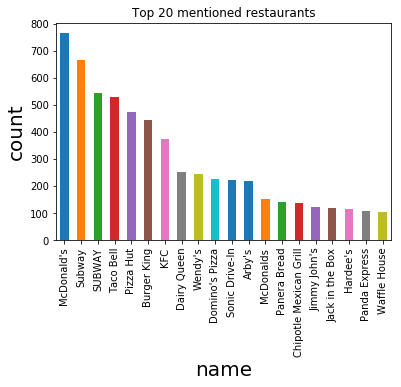

In [253]:
# top 20 restaurants recorded by count total
nameplot=fastfood_data['name'].value_counts()[:20].plot.bar(title='Top 20 mentioned restaurants')
nameplot.set_xlabel('name',size=20)
nameplot.set_ylabel('count',size=20)

#### We can see that McDonald's, Subway, SUBWAY are the top3 mentioned places to eat fast food
## NLP: More data cleaning is needed!!!
#### We can see there are "McDonald's" and "McDonalds" and "Subway" and "SUBWAY"
#### Let's apply NLTK's edit distance function to find the edit distance between those names

#### **Edit Distance:** The distance between the source string and the target string is the minimum number of edit operations (deletions, insertions, or substitutions) required to transform the source into the target. The lower the distance, the more similar the two strings. 

In [254]:
import nltk

#### uncomment if you want to run the edit-distance similarity checking.
### Due the reason of time-consuming, I commented out the code.
### I copied and pasted the results to cells below

In [255]:
# # obtained unique names of restaurants
# restaurant_names = fastfood_data['name'].unique()

# # calculate similarity and record most-similar names together
# most_similar = []
# for i in range(len(restaurant_names)):
#     # temporary list to store the current similar words
#     temp_similar = [restaurant_names[i]]
    
#     # compare and save similar words
#     for j in range(len(restaurant_names)):
#         if restaurant_names[i] == restaurant_names[j]:
#             continue
#         if nltk.edit_distance(restaurant_names[i].lower(), restaurant_names[j].lower()) < 3:
#             temp_similar.append(restaurant_names[j])
            
#     # similar word(s) found
#     if len(temp_similar) > 1:
#         most_similar.append(temp_similar)
#     if i > 0 and i % 10 == 0:
#         print("index", i-10, "-", i, "checking finished| most similar size:", len(most_similar))
# print("similarity checking finished")

# # count number of similar words
# most_similar_word_count = 0
# for i in most_similar:
#     most_similar_word_count += len(i)
# print("size of the most similar list:", most_similar_word_count)
# most_similar

#### If you exam the output of the most_similar list, you can see edit-distance algorithm did a very good job except some minor inaccurate results.

In [256]:
# let's remove the exceptions from the above most_similar's list
# since the list is small and we only need to do some minor changes, I will just do it manually
# to avoid running edit-distance again
most_similar_edited = [["Carl's Jr.", "Carl's Jr", 'Carls Jr'],
 ["McDonald's", "Mc Donald's", 'Mcdonalds', 'McDonalds'],
 ['Cook-Out', 'Cook Out', 'CookOut'],
 ["Steak 'n Shake",
  "STEAK 'N SHAKE",
  'Steak N Shake',
  'Steak n Shake',
  "Steak 'N Shake"],
 ['QDOBA Mexican Eats', 'Qdoba Mexican Eats'],
 ['Burger King', 'Burger King®'],
 ["Hardee's", 'Hardees'],
 ['Taco Time', 'TacoTime'],
 ["Arby's", 'Arbys'],
 ['Chick-fil-A', 'Chick-Fil-A', 'ChickfilA'],
 ['Subway', 'SUBWAY'],
 ['Kfc', 'KFC'],
 ["Jack's", 'Jacks'],
 ['Sonic Drive-In',
  'SONIC Drive-In',
  'SONIC Drive In',
  'Sonic DriveIn',
  'Sonic Drive-in'],
 ["Church's Chicken", 'Churchs Chicken'],
 ['Big Boys', 'Big Boy'],
 ['Dairy Queen', 'Dairy queen'],
 ['Guthries', "Guthrie's"],
 ['Chick-Fil-A', 'Chick-fil-A', 'ChickfilA'],
 ["Wendy's", 'Wendys'],
 ["Jimmy John's", 'Jimmy Johns'],
 ['Dairy Queen Grill Chill', 'Dairy Queen Grill & Chill'],
 ["Moe's Southwest Grill", 'Moes Southwest Grill'],
 ["Domino's Pizza", 'Dominos Pizza'],
 ["Rally's", 'Rallys'],
 ['Full Moon Bar-B-Que', 'Full Moon Bar B Que'],
 ["Guthrie's", 'Guthries'],
 ["McAlister's Deli", "Mcalister's Deli", 'McAlisters Deli'],
 ["Jason's Deli", 'Jasons Deli'],
 ['KFC', 'Kfc', 'KFC Kentucky Fried Chicken', 'KFC - Kentucky Fried Chicken'],
 ['Popeyes Louisiana Kitchen', "Popeye's Louisiana Kitchen"],
 ["Long John Silver's", 'Long John Silvers'],
 ['BLIMPIE', 'Blimpie'],
 ['Five Guys Burgers Fries', 'Five Guys Burgers & Fries'],
 ['SUBWAY', 'Subway'],
 ['Dairy Queen Grill & Chill', 'Dairy Queen Grill Chill'],
 ['Potbelly Sandwich Works', 'Pot Belly Sandwich Works'],
 ["Charley's Grilled Subs", 'Charleys Grilled Subs'],
 ["Jersey Mike's Subs", 'Jersey Mikes Subs'],
 ['In-N-Out Burger', 'InNOut Burger'],
 ["Culver's", "CULVER'S", 'Culvers'],
 ["Famous Dave's", 'Famous Daves'],
 ["Freddy's Frozen Custard Steakburgers",
  'Freddys Frozen Custard Steakburgers',
  "Freddy's Frozen Custard & Steakburgers"],
 ['Cook Out', 'Cook-Out', 'CookOut'],
 ['TacoTime', 'Taco Time'],
 ['Hooters', 'Roosters'],
 ['BurgerFi', 'Burgerfi'],
 ["Chen's Restaurant", "Chan's Restaurant"],
 ['Taco Del Mar', 'Taco del Mar'],
 ['SONIC Drive-In',
  'Sonic Drive-In',
  'SONIC Drive In',
  'Sonic DriveIn',
  'Sonic Drive-in'],
 ['Ciscos Taqueria', "Cisco's Taqueria"],
 ['China King', 'China Lin'],
 ["Bojangles' Famous Chicken 'n Biscuits",
  'Bojangles Famous Chicken n Biscuits'],
 ["Dominic's of New York", 'Dominics of New York'],
 ["Papa John's Pizza", 'Papa Johns Pizza'],
 ['Chanellos Pizza', 'Chanello’s Pizza'],
 ["Fazoli's", 'Fazolis'],
 ['Wing Street', 'Wingstreet'],
 ["George's Gyros Spot", "George's Gyros Spot 2"],
 ['Taco Johns', "Taco John's"],
 ['RUNZA', 'Runza'],
 ['Bru Burger Bar', 'Grub Burger Bar'],
 ["Taco John's", 'Taco Johns'],
 ["Bob's Burger Brew", "Bob's Burgers Brew", "Bob's Burgers Brew", "Bob's Burger Brew"],
 ['Best Burgers', 'Best Burger'],
 ['Burgermaster', 'Burger Master'],
 ["Dick's Drive-In", "DK's Drive-In"],
 ["Charley's Grill Spirits", "Charley's Grill & Spirits"],
 ['Tom Drive-in', "Tom's Drive-In"],
 ["Fox's Pizza Den", 'Foxs Pizza Den'],
 ["Mc Donald's", "McDonald's", 'Mcdonalds', 'McDonalds'],
 ['Taco CASA', 'Taco Casa'],
 ["Mcalister's Deli", "McAlister's Deli", 'McAlisters Deli'],
 ['Saras Too', "Sara's Too"],
 ['Backyard Burgers', 'Back Yard Burgers'],
 ["CULVER'S", "Culver's", 'Culvers'],
 ["Simple Simon's Pizza", 'Simple Simons Pizza'],
 ['China Sea', 'China Star', 'China Bear'],
 ["Dino's Drive In", "Dan's Drive In"],
 ["STEAK 'N SHAKE",
  "Steak 'n Shake",
  'Steak N Shake',
  'Steak n Shake',
  "Steak 'N Shake"],
 ['Stanfields Steak House', "Stanfield's Steakhouse"],
 ['Wingstreet', 'Wing Street'],
 ["Big Billy's Burger Joint", 'Big Billys Burger Joint'],
 ['Big Boy', 'Big Boys'],
 ["Frisch's Big Boy Restaurant", "1 Frisch's Big Boy Restaurant", 
  "40 Frisch's Big Boy Restaurant", "1 Frisch's Big Boy Restaurant",
  "90 Frisch's Big Boy Restaurant"],
 ['Fireplace Restaurant Lounge', 'Fireplace Restaurant & Lounge'],
 ["Carl's Jr", "Carl's Jr.", 'Carls Jr'],
 ["Rick's on the River", 'Ricks on the River'],
 ['Grub Burger Bar', 'Bru Burger Bar'],
 ["Franky's", "Grandy's"],
 ['Gyro X-Press', 'Gyro Express'],
 ['Dominos Pizza', "Domino's Pizza"],
 ["Pietro's Pizza Gallery of Games", "Pietro's Pizza & Gallery of Games"],
 ['Burrtio Amigos', 'Burrito Amigos'],
 ["Albee's Ny Gyros", "Albee's NY Gyros"],
 ['Gyro Stop', 'Gyro Spot'],
 ['Nicholas Restaurant', "Nicholas' Restaurant"],
 ['Mcdonalds', "McDonald's", "Mc Donald's", 'McDonalds'],
 ['Burgerfi', 'BurgerFi'],
 ["Ryan's", 'Ryans'],
 ['Taste of Buffalo Pizzeria', 'Taste Of Buffalo Pizzeria'],
 ['Bad Daddys Burger Bar', "Bad Daddy's Burger Bar"],
 ["Zaxby's", "Arby's"],
 ["Topper's Pizza", 'Toppers Pizza'],
 ['C J Drive In', 'C & J Drive In'],
 ['Full Moon Bar B Que', 'Full Moon Bar-B-Que'],
 ['China Lin', 'China King'],
 ["Raising Cane's Chicken Fingers", 'Raising Canes Chicken Fingers'],
 ["Mary's Pizza Shack", 'Marys Pizza Shack'],
 ['Peking Chinese Restaurants', 'Peking Chinese Restaurant'],
 ['Arbys', "Arby's"],
 ['SONIC Drive In',
  'Sonic Drive-In',
  'SONIC Drive-In',
  'Sonic DriveIn',
  'Sonic Drive-in'],
 ['Hardees', "Hardee's"],
 ['McDonalds', "McDonald's", "Mc Donald's", 'Mcdonalds'],
 ['Wendys', "Wendy's"],
 ['Papa Johns Pizza', "Papa John's Pizza"],
 ["George's Gyros Spot 2", "George's Gyros Spot"],
 ['ChickfilA', 'Chick-fil-A', 'Chick-Fil-A'],
 ['Rallys', "Rally's"],
 ['C & J Drive In', 'C J Drive In'],
 ['Steak N Shake',
  "Steak 'n Shake",
  "STEAK 'N SHAKE",
  'Steak n Shake',
  "Steak 'N Shake"],
 ["Popeye's Louisiana Kitchen", 'Popeyes Louisiana Kitchen'],
 ["DJ's Drive-In", "DK's Drive-In"],
 ["Dan's Drive In", "Dino's Drive In"],
 ['Best Burger', 'Best Burgers', 'Beef Burger'],
 ['Jimmy Johns', "Jimmy John's"],
 ['BaskinRobbins', 'Baskin-Robbins', 'Baskin Robbins'],
 ['Carls Jr', "Carl's Jr.", "Carl's Jr"],
 ['WG Grinders', 'Wg Grinders'],
 ['McAlisters Deli', "McAlister's Deli", "Mcalister's Deli"],
 ['Fazolis', "Fazoli's"],
 ['Marys Pizza Shack', "Mary's Pizza Shack"],
 ['Bojangles Famous Chicken n Biscuits',
  "Bojangles' Famous Chicken 'n Biscuits"],
 ['Jacks', "Jack's"],
 ["Hardee's/red Burrito", 'Hardees Red Burrito', "Hardee's/Red Burrito"],
 ['Captain Ds', "Captain D'S"],
 ['Mr Hero', 'Mr. Hero'],
 ["Chan's Restaurant", "Chen's Restaurant"],
 ['Ritters Frozen Custard', "Ritter's Frozen Custard"],
 ['Hot Dog on a Stick', 'Hot Dog On A Stick'],
 ['Jersey Mikes Subs', "Jersey Mike's Subs"],
 ['AW Restaurants',
  'Aw Restaurants',
  'AWRestaurants',
  'A W Restaurant',
  'AW Restaurant',
  'Jam Restaurants'],
 ['Long John Silvers', "Long John Silver's"],
 ["Rally's Hamburgers", 'Rallys Hamburgers'],
 ['HomeTown Buffet', 'Hometown Buffet'],
 ['Back Yard Burgers', 'Backyard Burgers'],
 ['Hardees Red Burrito', "Hardee's/red Burrito", "Hardee's/Red Burrito"],
 ["DK's Drive-In", "Dick's Drive-In", "DJ's Drive-In", "K's Drive In"],
 ['Baskin-Robbins', 'BaskinRobbins', 'Baskin Robbins'],
 ['Churchs Chicken', "Church's Chicken"],
 ['Blimpie', 'BLIMPIE'],
 ['Foxs Pizza Den', "Fox's Pizza Den"],
 ['Steak n Shake',
  "Steak 'n Shake",
  "STEAK 'N SHAKE",
  'Steak N Shake',
  "Steak 'N Shake"],
 ['Rallys Hamburgers', "Rally's Hamburgers"],
 ['Sonic DriveIn',
  'Sonic Drive-In',
  'SONIC Drive-In',
  'SONIC Drive In',
  'Sonic Drive-in'],
 ['Famous Daves', "Famous Dave's"],
 ['Beef Burger', 'Best Burger'],
 ['Dominics of New York', "Dominic's of New York"],
 ['Z-Pizza', 'zpizza'],
 ['KFC - Kentucky Fried Chicken', 'KFC Kentucky Fried Chicken'],
 ["Rockne's", 'Rocknes'],
 ["Hardee's/Red Burrito", "Hardee's/red Burrito", 'Hardees Red Burrito'],
 ['Aw Restaurants',
  'AW Restaurants',
  'AWRestaurants',
  'A W Restaurant',
  'AW Restaurant',
  'Jam Restaurants'],
 ['AWRestaurants', 'AW Restaurants', 'Aw Restaurants', 'AW Restaurant'],
 ["Hardee's Restaurant", "Hardee's Restaurants"],
 ["Hardee's Restaurants", "Hardee's Restaurant"],
 ["Stanfield's Steakhouse", 'Stanfields Steak House'],
 ['Dunkin Donuts', "Dunkin' Donuts"],
 ['Einstein Bros. Bagels', 'Einstein Bros Bagels'],
 ['Simple Simons Pizza', "Simple Simon's Pizza"],
 ['A W Restaurant', 'AW Restaurants', 'Aw Restaurants', 'AW Restaurant'],
 ['Einstein Bros Bagels', 'Einstein Bros. Bagels'],
 ['Roosters', 'Hooters'],
 ['Culvers', "Culver's", "CULVER'S"],
 ['Slice of Life', 'Slice Of Life'],
 ['Jasons Deli', "Jason's Deli"],
 ['Wg Grinders', 'WG Grinders'],
 ['Charleys Grilled Subs', "Charley's Grilled Subs"],
 ['Freddys Frozen Custard Steakburgers',
  "Freddy's Frozen Custard Steakburgers"],
 ['Moes Southwest Grill', "Moe's Southwest Grill"],
 ['CookOut', 'Cook-Out', 'Cook Out'],
 ['Peking Chinese Restaurant', 'Peking Chinese Restaurants'],
 ['InNOut Burger', 'In-N-Out Burger'],
 ["Nicholas' Restaurant", 'Nicholas Restaurant'],
 ['Chanello’s Pizza', 'Chanellos Pizza'],
 ['Ryans', "Ryan's"],
 ['Burger King®', 'Burger King'],
 ['Toppers Pizza', "Topper's Pizza"],
 ["Albee's NY Gyros", "Albee's Ny Gyros"],
 ['Qdoba Mexican Eats', 'QDOBA Mexican Eats'],
 ['Runza', 'RUNZA'],
 ['Slice Of Life', 'Slice of Life'],
 ['Mai-Tai Restaurant', 'Mai Tai Restaurant'],
 ['Gyro Express', 'Gyro X-Press'],
 ['zpizza', 'Z-Pizza'],
 ['Raising Canes Chicken Fingers', "Raising Cane's Chicken Fingers"],
 ['Rocknes', "Rockne's"],
 ['LL Hawaiian Barbecue', 'L L Hawaiian Barbecue', 'L L Hawaiian Barbeque'],
 ['Dairy queen', 'Dairy Queen'],
 ['Blakes Lotaburger', "Blake's Lotaburger"],
 ['Emidio & Sons Italian Restaurant', 'Emidio Sons Italian Restaurant'],
 ['Taste Of Buffalo Pizzeria', 'Taste of Buffalo Pizzeria'],
 ['L L Hawaiian Barbecue',
  'LL Hawaiian Barbecue',
  'L L Hawaiian Barbeque',
  'L & L Hawaiian Barbecue'],
 ['Killer Burgers', 'Killer Burger'],
 ["Steak 'N Shake",
  "Steak 'n Shake",
  "STEAK 'N SHAKE",
  'Steak N Shake',
  'Steak n Shake'],
 ['Burrito Amigos', 'Burrtio Amigos'],
 ["Zack's Hamburgers", "Jack's Hamburgers"],
 ['AW Restaurant',
  'AW Restaurants',
  'Aw Restaurants',
  'AWRestaurants',
  'A W Restaurant'],
 ['Jam Restaurants', 'AW Restaurants', 'Aw Restaurants'],
 ['Big Billys Burger Joint', "Big Billy's Burger Joint"],
 ['L L Hawaiian Barbeque', 'LL Hawaiian Barbecue', 'L L Hawaiian Barbecue'],
 ["Ritter's Frozen Custard", 'Ritters Frozen Custard'],
 ["Pietro's Pizza & Gallery of Games", "Pietro's Pizza Gallery of Games"],
 ["K's Drive In", "DK's Drive-In"],
 ['Killer Burger', 'Killer Burgers'],
 ["Dunkin' Donuts", 'Dunkin Donuts'],
 ['Farlows on the Water', "Farlow's On The Water"],
 ['Hometown Buffet', 'HomeTown Buffet'],
 ["Blake's Lotaburger", 'Blakes Lotaburger'],
 ["Jack's Hamburgers", "Zack's Hamburgers"],
 ["Cisco's Taqueria", 'Ciscos Taqueria'],
 ["Grandy's", "Franky's"],
 ["Farlow's On The Water", 'Farlows on the Water'],
 ["Bad Daddy's Burger Bar", 'Bad Daddys Burger Bar'],
 ['Baskin Robbins', 'BaskinRobbins', 'Baskin-Robbins'],
 ["Sara's Too", 'Saras Too'],
 ['T & L Hotdogs', 'T & L Hot Dogs'],
 ["Tom's Drive-In", 'Tom Drive-in'],
 ['Sonic Drive-in',
  'Sonic Drive-In',
  'SONIC Drive-In',
  'SONIC Drive In',
  'Sonic DriveIn'],
 ['Taco Casa', 'Taco CASA'],
 ['Emidio Sons Italian Restaurant', 'Emidio & Sons Italian Restaurant'],
 ['Fireplace Restaurant & Lounge', 'Fireplace Restaurant Lounge'],
 ['Mai Tai Restaurant', 'Mai-Tai Restaurant'],
 ['Ricks on the River', "Rick's on the River"],
 ['Taco del Mar', 'Taco Del Mar'],
 ['Five Guys Burgers & Fries', 'Five Guys Burgers Fries'],
 ['Mr. Hero', 'Mr Hero'],
 ["Captain D'S", 'Captain Ds'],
 ['Gyro Spot', 'Gyro Stop'],
 ["Charley's Grill & Spirits", "Charley's Grill Spirits"],
 ['Hot Dog On A Stick', 'Hot Dog on a Stick'],
 ['L & L Hawaiian Barbecue', 'L L Hawaiian Barbecue'],
 ['Pot Belly Sandwich Works', 'Potbelly Sandwich Works'],
 ['Burger Master', 'Burgermaster'],
 ["Freddy's Frozen Custard & Steakburgers",
  "Freddy's Frozen Custard Steakburgers"]]

In [257]:
# let's sort them by the first element of each sublist
def sortFirst(val): 
    return val[0]  

# sorts the array in ascending according to 1st element 
most_similar_edited.sort(key = sortFirst)  
most_similar_edited

[['A W Restaurant', 'AW Restaurants', 'Aw Restaurants', 'AW Restaurant'],
 ['AW Restaurant',
  'AW Restaurants',
  'Aw Restaurants',
  'AWRestaurants',
  'A W Restaurant'],
 ['AW Restaurants',
  'Aw Restaurants',
  'AWRestaurants',
  'A W Restaurant',
  'AW Restaurant',
  'Jam Restaurants'],
 ['AWRestaurants', 'AW Restaurants', 'Aw Restaurants', 'AW Restaurant'],
 ["Albee's NY Gyros", "Albee's Ny Gyros"],
 ["Albee's Ny Gyros", "Albee's NY Gyros"],
 ["Arby's", 'Arbys'],
 ['Arbys', "Arby's"],
 ['Aw Restaurants',
  'AW Restaurants',
  'AWRestaurants',
  'A W Restaurant',
  'AW Restaurant',
  'Jam Restaurants'],
 ['BLIMPIE', 'Blimpie'],
 ['Back Yard Burgers', 'Backyard Burgers'],
 ['Backyard Burgers', 'Back Yard Burgers'],
 ["Bad Daddy's Burger Bar", 'Bad Daddys Burger Bar'],
 ['Bad Daddys Burger Bar', "Bad Daddy's Burger Bar"],
 ['Baskin Robbins', 'BaskinRobbins', 'Baskin-Robbins'],
 ['Baskin-Robbins', 'BaskinRobbins', 'Baskin Robbins'],
 ['BaskinRobbins', 'Baskin-Robbins', 'Baskin Robbin

#### The reason why I also track similar words for words that have already be recorded is because examples like this can derive more unseen but similar words.
['L & L Hawaiian Barbecue', 'L L Hawaiian Barbecue'],

['L L Hawaiian Barbecue',
  'LL Hawaiian Barbecue',
  'L L Hawaiian Barbeque',
  'L & L Hawaiian Barbecue']

In [258]:
# let's process the data second time manually to make the data cleaner
most_similar_sorted = [
 ['AW Restaurant', 'AW Restaurants', 'Aw Restaurants', 'A W Restaurant', 'AWRestaurants'],
 ["Albee's NY Gyros", "Albee's Ny Gyros"],
 ["Arby's", 'Arbys'],
 ['BLIMPIE', 'Blimpie'],
 ['Back Yard Burgers', 'Backyard Burgers'],
 ["Bad Daddy's Burger Bar", 'Bad Daddys Burger Bar'],
 ['Baskin Robbins', 'BaskinRobbins', 'Baskin-Robbins'],
 ['Best Burgers', 'Best Burger'],
 ["Big Billy's Burger Joint", 'Big Billys Burger Joint'],
 ['Big Boy', 'Big Boys'],
 ["Blake's Lotaburger", 'Blakes Lotaburger'],
 ['Blimpie', 'BLIMPIE'],
 ["Bob's Burger Brew",
  "Bob's Burgers Brew"],
 ['Bojangles Famous Chicken n Biscuits',
  "Bojangles' Famous Chicken 'n Biscuits"],
 ['Burger King', 'Burger King®'],
 ['Burger Master', 'Burgermaster'],
 ['BurgerFi', 'Burgerfi'],
 ['Burgermaster', 'Burger Master'],
 ['Burrito Amigos', 'Burrtio Amigos'],
 ['C & J Drive In', 'C J Drive In'],
 ["CULVER'S", "Culver's", 'Culvers'],
 ["Captain D'S", 'Captain Ds'],
 ["Carl's Jr", "Carl's Jr.", 'Carls Jr'],
 ["Chan's Restaurant", "Chen's Restaurant"],
 ['Chanellos Pizza', 'Chanello’s Pizza'],
 ["Charley's Grill & Spirits", "Charley's Grill Spirits"],
 ["Charley's Grilled Subs", 'Charleys Grilled Subs'],
 ["Chen's Restaurant", "Chan's Restaurant"],
 ['Chick-Fil-A', 'Chick-fil-A', 'ChickfilA'],
 ['China Sea', 'China Star', 'China Bear'],
 ["Church's Chicken", 'Churchs Chicken'],
 ["Cisco's Taqueria", 'Ciscos Taqueria'],
 ['Cook Out', 'Cook-Out', 'CookOut'],
 ["Culver's", "CULVER'S", 'Culvers'],
 ['Dairy Queen', 'Dairy queen'],
 ['Dairy Queen Grill & Chill', 'Dairy Queen Grill Chill'],
 ["Dominic's of New York", 'Dominics of New York'],
 ["Domino's Pizza", 'Dominos Pizza'],
 ['Dunkin Donuts', "Dunkin' Donuts"],
 ['Einstein Bros Bagels', 'Einstein Bros. Bagels'],
 ['Emidio & Sons Italian Restaurant', 'Emidio Sons Italian Restaurant'],
 ["Famous Dave's", 'Famous Daves'],
 ["Farlow's On The Water", 'Farlows on the Water'],
 ["Fazoli's", 'Fazolis'],
 ['Fireplace Restaurant & Lounge', 'Fireplace Restaurant Lounge'],
 ['Five Guys Burgers & Fries', 'Five Guys Burgers Fries'],
 ["Fox's Pizza Den", 'Foxs Pizza Den'],
 ["Freddy's Frozen Custard & Steakburgers",
  'Freddys Frozen Custard Steakburgers',
  "Freddy's Frozen Custard Steakburgers"],
 ["Frisch's Big Boy Restaurant",
  "1 Frisch's Big Boy Restaurant",
  "40 Frisch's Big Boy Restaurant",
  "1 Frisch's Big Boy Restaurant",
  "90 Frisch's Big Boy Restaurant"],
 ['Full Moon Bar B Que', 'Full Moon Bar-B-Que'],
 ["George's Gyros Spot", "George's Gyros Spot 2"],
 ['Grub Burger Bar', 'Bru Burger Bar'],
 ["Guthrie's", 'Guthries'],
 ['Gyro Express', 'Gyro X-Press'],
 ['Gyro Spot', 'Gyro Stop'],
 ["Hardee's", 'Hardees'],
 ["Hardee's Restaurant", "Hardee's Restaurants"],
 ["Hardee's/Red Burrito", "Hardee's/red Burrito", 'Hardees Red Burrito'],
 ['HomeTown Buffet', 'Hometown Buffet'],
 ['Hooters', 'Roosters'],
 ['Hot Dog On A Stick', 'Hot Dog on a Stick'],
 ['In-N-Out Burger', 'InNOut Burger'],
 ["Jack's", 'Jacks'],
 ["Jack's Hamburgers", "Zack's Hamburgers"],
 ["Jason's Deli", 'Jasons Deli'],
 ["Jersey Mike's Subs", 'Jersey Mikes Subs'],
 ["Jimmy John's", 'Jimmy Johns'],
 ['KFC', 'Kfc', 'KFC Kentucky Fried Chicken', 'KFC - Kentucky Fried Chicken'],
 ['Killer Burger', 'Killer Burgers'],
 ['L & L Hawaiian Barbecue', 'L L Hawaiian Barbecue',
  'LL Hawaiian Barbecue'],
 ["Long John Silver's", 'Long John Silvers'],
 ['Mai Tai Restaurant', 'Mai-Tai Restaurant'],
 ["Mary's Pizza Shack", 'Marys Pizza Shack'],
 ["Mc Donald's", "McDonald's", 'Mcdonalds', 'McDonalds'],
 ["McAlister's Deli", "Mcalister's Deli", 'McAlisters Deli'],
 ["Moe's Southwest Grill", 'Moes Southwest Grill'],
 ['Mr Hero', 'Mr. Hero'],
 ['Nicholas Restaurant', "Nicholas' Restaurant"],
 ["Papa John's Pizza", 'Papa Johns Pizza'],
 ['Peking Chinese Restaurant', 'Peking Chinese Restaurants'],
 ["Pietro's Pizza & Gallery of Games", "Pietro's Pizza Gallery of Games"],
 ["Popeye's Louisiana Kitchen", 'Popeyes Louisiana Kitchen'],
 ['Pot Belly Sandwich Works', 'Potbelly Sandwich Works'],
 ['QDOBA Mexican Eats', 'Qdoba Mexican Eats'],
 ['RUNZA', 'Runza'],
 ["Raising Cane's Chicken Fingers", 'Raising Canes Chicken Fingers'],
 ["Rally's", 'Rallys'],
 ["Rally's Hamburgers", 'Rallys Hamburgers'],
 ["Rick's on the River", 'Ricks on the River'],
 ["Ritter's Frozen Custard", 'Ritters Frozen Custard'],
 ["Rockne's", 'Rocknes'],
 ['Roosters', 'Hooters'],
 ['Runza', 'RUNZA'],
 ["Ryan's", 'Ryans'],
 ['SONIC Drive In',
  'Sonic Drive-In',
  'SONIC Drive-In',
  'Sonic DriveIn',
  'Sonic Drive-in'],
 ["STEAK 'N SHAKE",
  "Steak 'n Shake",
  'Steak N Shake',
  'Steak n Shake',
  "Steak 'N Shake"],
 ['SUBWAY', 'Subway'],
 ["Sara's Too", 'Saras Too'],
 ["Simple Simon's Pizza", 'Simple Simons Pizza'],
 ['Slice Of Life', 'Slice of Life'],
 ["Stanfield's Steakhouse", 'Stanfields Steak House'],
 ['T & L Hotdogs', 'T & L Hot Dogs'],
 ['Taco CASA', 'Taco Casa'],
 ['Taco Del Mar', 'Taco del Mar'],
 ["Taco John's", 'Taco Johns'],
 ['Taco Time', 'TacoTime'],
 ['Taste Of Buffalo Pizzeria', 'Taste of Buffalo Pizzeria'],
 ['Tom Drive-in', "Tom's Drive-In"],
 ["Topper's Pizza", 'Toppers Pizza'],
 ['WG Grinders', 'Wg Grinders'],
 ["Wendy's", 'Wendys'],
 ['Wg Grinders', 'WG Grinders'],
 ['Wing Street', 'Wingstreet'],
 ['Z-Pizza', 'zpizza'],
 ["Zack's Hamburgers", "Jack's Hamburgers"]]
print("cleaned, matched restaurant name count:", len(most_similar_sorted))

cleaned, matched restaurant name count: 115


#### Now, let's replace the matched names in our original dataset

In [259]:
# let's create a dictionary to make name replace easier
match_name_dict = {}
for row in most_similar_sorted:
    for similar_word in row:
        match_name_dict[similar_word] = row[0]
match_name_dict

{'AW Restaurant': 'AW Restaurant',
 'AW Restaurants': 'AW Restaurant',
 'Aw Restaurants': 'AW Restaurant',
 'A W Restaurant': 'AW Restaurant',
 'AWRestaurants': 'AW Restaurant',
 "Albee's NY Gyros": "Albee's NY Gyros",
 "Albee's Ny Gyros": "Albee's NY Gyros",
 "Arby's": "Arby's",
 'Arbys': "Arby's",
 'BLIMPIE': 'Blimpie',
 'Blimpie': 'Blimpie',
 'Back Yard Burgers': 'Back Yard Burgers',
 'Backyard Burgers': 'Back Yard Burgers',
 "Bad Daddy's Burger Bar": "Bad Daddy's Burger Bar",
 'Bad Daddys Burger Bar': "Bad Daddy's Burger Bar",
 'Baskin Robbins': 'Baskin Robbins',
 'BaskinRobbins': 'Baskin Robbins',
 'Baskin-Robbins': 'Baskin Robbins',
 'Best Burgers': 'Best Burgers',
 'Best Burger': 'Best Burgers',
 "Big Billy's Burger Joint": "Big Billy's Burger Joint",
 'Big Billys Burger Joint': "Big Billy's Burger Joint",
 'Big Boy': 'Big Boy',
 'Big Boys': 'Big Boy',
 "Blake's Lotaburger": "Blake's Lotaburger",
 'Blakes Lotaburger': "Blake's Lotaburger",
 "Bob's Burger Brew": "Bob's Burger Bre

In [260]:
# let's use the match_name_dict to replace names in the dataset to make it cleaner
names = fastfood_data['name'].values
print("size:", len(names))

# replace names with their dictionary value
for i in range(len(names)):
    if match_name_dict.get(names[i]) != None:
        names[i] = match_name_dict[names[i]]

fastfood_data['names'] = names

size: 10000


Number of unique restaurant: 1413


Text(0, 0.5, 'count')

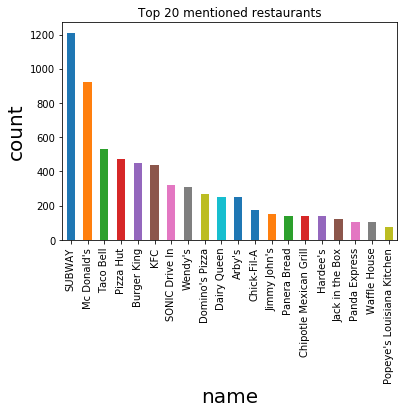

In [261]:
# top 20 restaurants recorded by count total
print("Number of unique restaurant:", fastfood_data['name'].nunique())
nameplot = fastfood_data['name'].value_counts()[:20].plot.bar(title='Top 20 mentioned restaurants')
nameplot.set_xlabel('name',size=20)
nameplot.set_ylabel('count',size=20)

#### After cleaning the data by using edit-distance and dictionary to store replaced matched, we can see that Mc Donald's became the 2nd most-mentioned fastfood restaurants and SUBWAY became the 1st. Many similar expressions are harmonized now.

## 6. Date data processing and visualizations
### Let's process the dateAdded and dateUpdate data

In [262]:
# take a peek at the dateAdded column
fastfood_data['dateAdded'].head()

0    2019-05-19T23:58:05Z
1    2018-01-18T18:30:23Z
2    2019-05-19T23:45:04Z
3    2019-05-19T23:26:58Z
4    2019-05-19T23:24:38Z
Name: dateAdded, dtype: object

### They are string or not datetime object.
### Let's convert them so we can access date and time easier

In [263]:
# let's parse the dates for dateAdded and dateUpdated
from datetime import datetime
from dateutil.parser import parse

In [264]:
# let's convert dateAdded and dateUpdated column data to 
# datetime object with apply function
fastfood_data['dateAdded'] = fastfood_data['dateAdded'].apply(
        lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))
fastfood_data['dateUpdated'] = fastfood_data['dateUpdated'].apply(
        lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))

In [265]:
# check the top 6 rows again to verify the datatype has changed
print(fastfood_data['dateAdded'].head())
print()
print(fastfood_data['dateUpdated'].head())

0   2019-05-19 23:58:05
1   2018-01-18 18:30:23
2   2019-05-19 23:45:04
3   2019-05-19 23:26:58
4   2019-05-19 23:24:38
Name: dateAdded, dtype: datetime64[ns]

0   2019-05-19 23:58:05
1   2019-05-19 23:45:05
2   2019-05-19 23:45:04
3   2019-05-19 23:26:58
4   2019-05-19 23:24:38
Name: dateUpdated, dtype: datetime64[ns]


In [266]:
# we can see the data type changed for the date related columns
fastfood_data.dtypes

dateAdded            datetime64[ns]
dateUpdated          datetime64[ns]
address                      object
categories                   object
primaryCategories            object
city                         object
country                      object
latitude                    float64
longitude                   float64
name                         object
postalCode                   object
province                     object
names                        object
dtype: object

##  Question 2: When are the data recorded and updated?

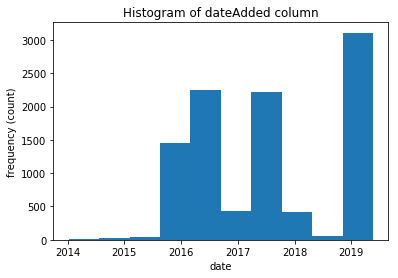

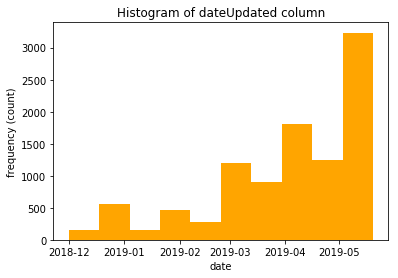

In [267]:
# histogram of dateAdded column
plt.hist(fastfood_data['dateAdded'])
plt.xlabel("date")
plt.ylabel("frequency (count)")
plt.title("Histogram of dateAdded column")
plt.show()

# histogram of dateUpdated column
plt.hist(fastfood_data['dateUpdated'], color="orange")
plt.xlabel("date")
plt.ylabel("frequency (count)")
plt.title("Histogram of dateUpdated column")
plt.show()

### From above combined histograms, we can observe:
#### 1: Newly updated data are primary recorded in 2019.
#### 2: Many data are originally recorded from 2014-2019.

## 7. Explore the food categories and visualize them

In [268]:
# what types of category do we have for primary categories?
fastfood_data['primaryCategories'].value_counts()

Accommodation & Food Services    10000
Name: primaryCategories, dtype: int64

#### Hmm, they are all listed as "Accommodation & Food Services"
#### Let's drop this column too

In [269]:
# drop primaryCategory column
fastfood_data = fastfood_data.drop(['primaryCategories'], axis=1)

# shape of dataset
print("Dimension after dropping columns:")
print(fastfood_data.shape)

# take a peek at the head to verify the drop is successful
fastfood_data.head()

Dimension after dropping columns:
(10000, 12)


,dateAdded,dateUpdated,address,categories,city,country,latitude,longitude,name,postalCode,province,names
0,2019-05-19 23:58:05,2019-05-19 23:58:05,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Greeley,US,40.39629,-104.69699,Carl's Jr,80631,CO,Carl's Jr
1,2018-01-18 18:30:23,2019-05-19 23:45:05,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Grand Junction,US,39.08135,-108.58689,Del Taco,81505,CO,Del Taco
2,2019-05-19 23:45:04,2019-05-19 23:45:04,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Grand Junction,US,39.09148,-108.55411,Which Wich,81506,CO,Which Wich
3,2019-05-19 23:26:58,2019-05-19 23:26:58,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Aurora,US,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,Chipotle Mexican Grill
4,2019-05-19 23:24:38,2019-05-19 23:24:38,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Denver,US,39.74044,-104.92636,Taco Bell,80220,CO,Taco Bell


#### Continue to the 'category' column

In [270]:
# let's split the categories string data by ","
categories = fastfood_data['categories'].values
for i in range(len(categories)):
    categories[i] = categories[i].split(",")

In [271]:
# update the "categories" column in the fastfood_data
fastfood_data['categories'] = categories
fastfood_data.head()

,dateAdded,dateUpdated,address,categories,city,country,latitude,longitude,name,postalCode,province,names
0,2019-05-19 23:58:05,2019-05-19 23:58:05,2555 11th Avenue,"[Fast Food Restaurants, Hamburgers and Hot Dog...",Greeley,US,40.39629,-104.69699,Carl's Jr,80631,CO,Carl's Jr
1,2018-01-18 18:30:23,2019-05-19 23:45:05,2513 Highway 6 And 50,"[Restaurant, Mexican Restaurants, Fast Food Re...",Grand Junction,US,39.08135,-108.58689,Del Taco,81505,CO,Del Taco
2,2019-05-19 23:45:04,2019-05-19 23:45:04,1125 Patterson Road,"[Sandwich Shops, Fast Food Restaurants, Restau...",Grand Junction,US,39.09148,-108.55411,Which Wich,81506,CO,Which Wich
3,2019-05-19 23:26:58,2019-05-19 23:26:58,3455 N Salida Court,"[Fast Food Restaurants, Mexican Restaurants, R...",Aurora,US,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,Chipotle Mexican Grill
4,2019-05-19 23:24:38,2019-05-19 23:24:38,5225 E Colfax Avenue,"[Fast Food Restaurants, Mexican Restaurants, R...",Denver,US,39.74044,-104.92636,Taco Bell,80220,CO,Taco Bell


## Question 3: What are the common categories of top 50 mentioned restaurant?

In [272]:
# top 50 most appeared restaurants in the dataset and their corresponding category
top50_name_by_number = fastfood_data['name'].value_counts()[:50].index.tolist()
top50_rest_categories = []
for name in top50_name_by_number:
    category = fastfood_data[fastfood_data.name == name]["categories"][:1].values[0]
    top50_rest_categories.append(category)

In [273]:
# remove stopword "Restaurants", "Restaurant", and "Fast Food Restaurants" in categories
stopwords = ["Fast Food Restaurants","Fast Food restaurants", "Fast Food", "Restaurants", "Restaurant", "restaurants", "restaurant"]
for i in range(len(top50_rest_categories)):
    for j in range(len(top50_rest_categories[i])):
        word = top50_rest_categories[i][j]
        # remove stopword as the only word given
        for stopword in stopwords:
            isRemoved = False
            if isRemoved == False and word == stopword:
                top50_rest_categories[i][j] = top50_rest_categories[i][j].replace(stopword, "")
                isRemoved = True

        # replace the stopword within a group of words
        for stopword in stopwords:
            if isRemoved == False and stopword in word:
                top50_rest_categories[i][j] = top50_rest_categories[i][j].replace(stopword, "")

In [274]:
top50_rest_categories

[['Delis And Delicatessens',
  '',
  'Carry-out food',
  'Caterers',
  'Delicatessens',
  'American ',
  'Take Out ',
  '',
  'Sandwiches',
  'Catering',
  '',
  'Sandwich Shops'],
 ['', 'Hamburgers and Hot Dogs', '', 'Take Out '],
 ['', 'Mexican ', ''],
 ['Pizza',
  'Carry-out food',
  'Caterers',
  ' delivery service',
  'American ',
  'Take Out ',
  '',
  'Home delivery beer and beverages',
  'Family Style ',
  'Catering',
  ''],
 ['Burger Joint',
  '',
  '  and Burger Joint Pleasant Valley',
  'Hot dog ',
  ' ',
  'Hamburger ',
  '  and Burger Joint',
  'Fast food ',
  ''],
 ['Carry-out food',
  'Caterers',
  'Barbecued poultry',
  'American ',
  '',
  'Take Out ',
  'Barbecue',
  'Chicken ',
  'Spare rib ',
  'Catering',
  ''],
 ['Carry Out Food',
  'American ',
  'Hot Dog Stands and ',
  'Take Out ',
  '',
  'Hamburgers and Hot Dogs',
  ''],
 ['Carry Out Food', '', '', 'Hamburgers and Hot Dogs', ''],
 ['Pizza', '', 'Food Delivery', 'Take Out ', '', 'Pizza Place', ''],
 ['Carry Ou

### Let's create WordCloud with given categories

In [275]:
from wordcloud import WordCloud

# empty string is declare 
text = "" 

# iterating through list of rows 
for row in top50_rest_categories : 
    # iterating through words in the row 
    for word in row:
        if len(word) == 0:
            continue
        # concatenate the words 
        if word[-1] == " ":
            word = word[:-1] # remove the last space character
        text = text + " " + word.replace(" ", "_") 
print("Vocabulary of our processed categories data:\n")
print(text)

Vocabulary of our processed categories data:

 Delis_And_Delicatessens Carry-out_food Caterers Delicatessens American Take_Out Sandwiches Catering Sandwich_Shops Hamburgers_and_Hot_Dogs Take_Out Mexican Pizza Carry-out_food Caterers _delivery_service American Take_Out Home_delivery_beer_and_beverages Family_Style Catering Burger_Joint __and_Burger_Joint_Pleasant_Valley Hot_dog  Hamburger __and_Burger_Joint Fast_food Carry-out_food Caterers Barbecued_poultry American Take_Out Barbecue Chicken Spare_rib Catering Carry_Out_Food American Hot_Dog_Stands_and Take_Out Hamburgers_and_Hot_Dogs Carry_Out_Food Hamburgers_and_Hot_Dogs Pizza Food_Delivery Take_Out Pizza_Place Carry_Out_Food Ice_Cream_and_Frozen_Desserts Dessert Hamburgers_and_Hot_Dogs Carry-out_food Tex-mex Southwestern American Family_style Mexican Sandwich_Shops Chicken Sandwich_Shops Catering_Companies American Food_Delivery Ovo Non-veg Coffee_Shops Traditional_American Coffeehouses Traditional_American Breakfast Bagels Bakery H

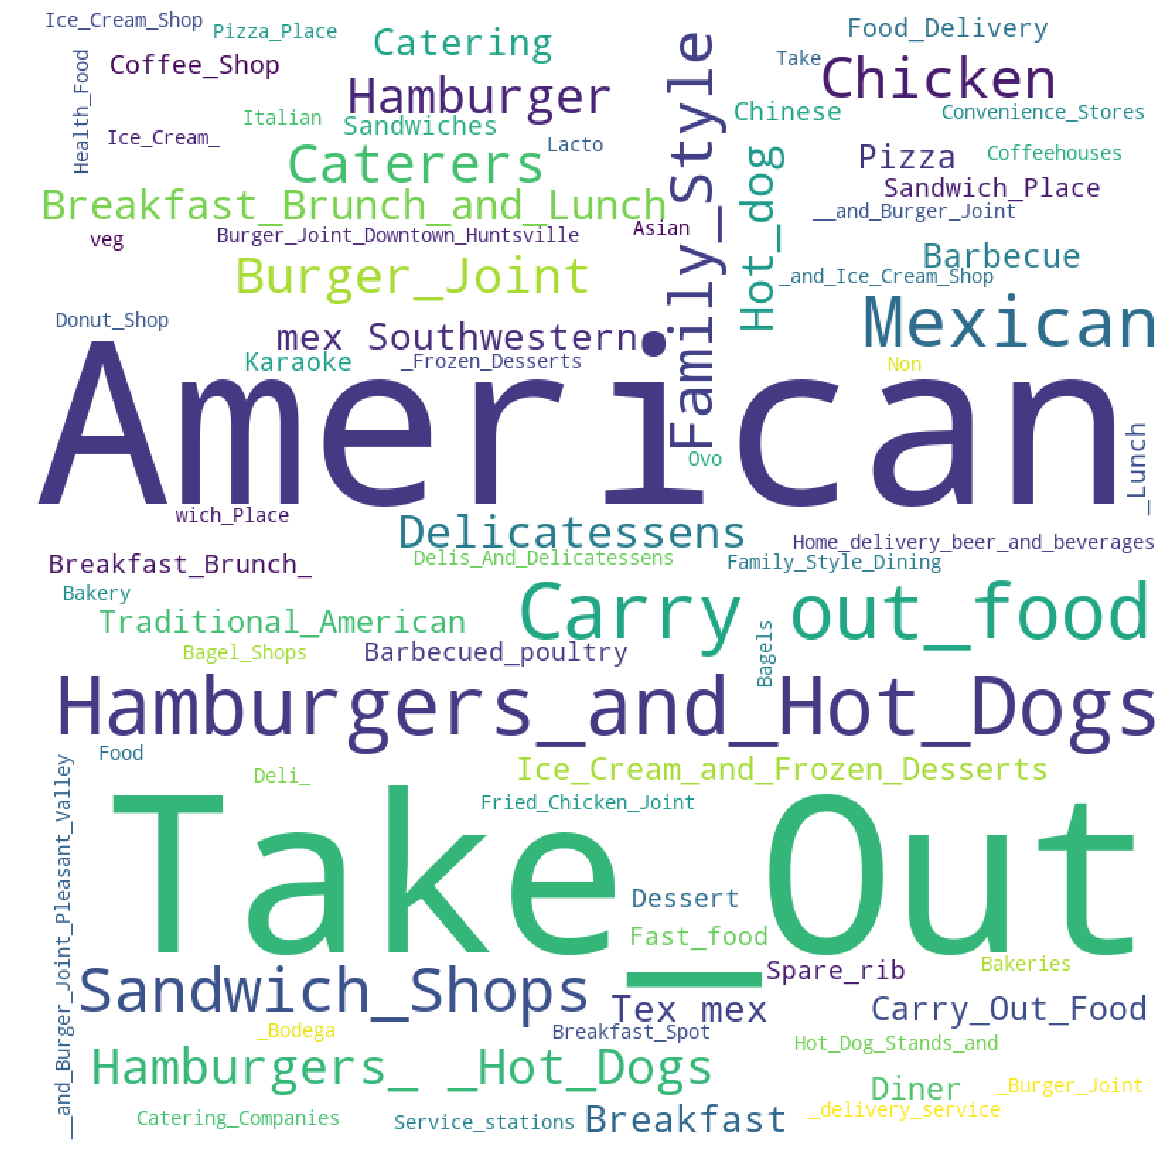

In [276]:
# generate wordcloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (16, 16), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

### From about wordcloud visualization, you can notice that most of the top 50 mentioned fast food restaurants has the categories of "take out", "American", and "Hamburger and Hot Dogs"

## 8. Let's explore the location data of given dataset

## Question 4: What cities are crowded with fast food restaurants?

Number of unique cities: 2810


Text(0, 0.5, 'count')

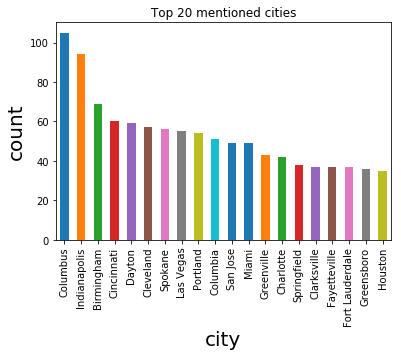

In [277]:
# top 20 fast food populated cities recorded by count total
print("Number of unique cities:", fastfood_data['city'].nunique())
nameplot = fastfood_data['city'].value_counts()[:20].plot.bar(title='Top 20 mentioned cities')
nameplot.set_xlabel('city',size=20)
nameplot.set_ylabel('count',size=20)

### let's run pandas' .descirbe() function to see the min, max, and mean of number of fast food restaurants in different cities

In [278]:
# let's run pandas' .descirbe() function 
rest_count_by_city = fastfood_data['city'].value_counts()
rest_count_by_city.describe()

count    2810.000000
mean        3.558719
std         6.260422
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       105.000000
Name: city, dtype: float64

### Many cities has only 1-3 restaurants opened and our mean number of restaurants opened is 3.55.
### How many are cities open less than 4 fast food restaurants in our dataset?

In [279]:
print(len(rest_count_by_city[rest_count_by_city < 4]), "cities opened less than 4 fast food restaurants")
print("They are", round(100*len(rest_count_by_city[rest_count_by_city < 4])/len(rest_count_by_city),2), "%"),
print("of the total cities recorded in the dataset")

2121 cities opened less than 4 fast food restaurants
They are 75.48 %
of the total cities recorded in the dataset


### Let's present our finding with pie chart to show the percentage

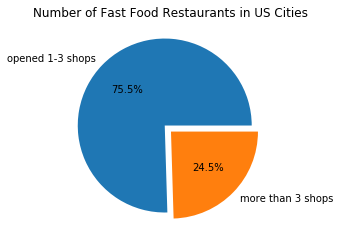

In [280]:
# plot pie chart
fig, ax = plt.subplots()
total_cities_with_less_than_4_rests = len(rest_count_by_city[rest_count_by_city < 4])
total_cities_with_greater_equal_4_rests = fastfood_data['city'].nunique() - total_cities_with_less_than_4_rests
values = [total_cities_with_less_than_4_rests, total_cities_with_greater_equal_4_rests]
ax.pie(values, 
       labels=["opened 1-3 shops", "more than 3 shops"], autopct='%.1f%%', radius=1, 
       explode = (0.1, 0))
ax.set_aspect('equal')
ax.set_title("Number of Fast Food Restaurants in US Cities")
plt.show()

#### From above pie-chart, we can see 75.5% of the cities in our dataset has only opened 1-3 fast food restaurants.

## Question 5: What states are crowded with fast food restaurants?

### Let's convert our fastfood_data dataframe's state to their full name instead of 2 letter code first

In [281]:
# input 2 letter code name for easier conversion
us_state_names = pd.read_csv('../input/us2letterstatecodecsv/US-2-letter-state-code.csv')
us_state_names.head()

,state_name,state_code
0,Alabama,AL
1,Alaska,AK
2,American Samoa,AS
3,Arizona,AZ
4,Arkansas,AR


In [282]:
us_state_names.columns

Index(['state_name', 'state_code'], dtype='object')

In [283]:
# convert the names of the states
def convert_state_names(state_code):
    return us_state_names[us_state_names['state_code']== state_code].values[0][0]

# use the above function to convert code to name
fastfood_data['province_full'] = ""
state_names = [None] * len(fastfood_data['province'].values)
state_codes = fastfood_data['province'].values
for i in range(len(state_codes)):
    state_names[i] = convert_state_names(state_codes[i])
print(state_names)

# # let's replace the province column values with full state names
fastfood_data['province_full'] = state_names
fastfood_data['province_full'].head()

['Colorado', 'Colorado', 'Colorado', 'Colorado', 'Colorado', 'Colorado', 'Colorado', 'Arkansas', 'Colorado', 'Colorado', 'Colorado', 'Colorado', 'Colorado', 'Colorado', 'Arkansas', 'Arkansas', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Oregon', 'New York', 'Oregon', 'Nebraska', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Florida', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Mississippi', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Georgia', 'Georgia', 'Alaska', 'Alabama', 'Alabama'

0    Colorado
1    Colorado
2    Colorado
3    Colorado
4    Colorado
Name: province_full, dtype: object

In [284]:
fastfood_data['province'].head()

0    CO
1    CO
2    CO
3    CO
4    CO
Name: province, dtype: object

Number of unique provinces: 47


Text(0, 0.5, 'count')

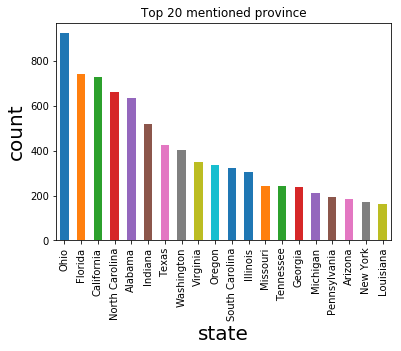

In [285]:
# top 20 fast food populated states recorded by count total
print("Number of unique provinces:", fastfood_data['province_full'].nunique())
nameplot = fastfood_data['province_full'].value_counts()[:20].plot.bar(title='Top 20 mentioned province')
nameplot.set_xlabel('state',size=20) # changed the label to state; it's the US
nameplot.set_ylabel('count',size=20)

In [286]:
fastfood_data['province_full'].value_counts().describe()

count     47.000000
mean     212.765957
std      220.791877
min        1.000000
25%       71.500000
50%      142.000000
75%      274.500000
max      922.000000
Name: province_full, dtype: float64

In [287]:
fastfood_data['province_full'].value_counts()[fastfood_data['province_full'].value_counts() == 1]

Connecticut    1
Name: province_full, dtype: int64

### From above descriptions, the stats show that the average number of fast food restaurants opened in different US states is 212. 
### Among 47 recorded states, OH(Ohio) has the maximum number of fast food restaurants opened. In Ohio, there are 922 fast food restaurants opened. CT(Connecticut) has only 1 fast food restaurant opened.

## Questions 6: What are the proportions of different fast food restaurants in top 3 mentioned cities?

In [288]:
# get top 3 fast food populated cities
top3_fastfood_populated_cities = fastfood_data['city'].value_counts()[:3].index.tolist()
top3_fastfood_populated_cities[:3]

['Columbus', 'Indianapolis', 'Birmingham']

In [289]:
# take a look at the restaurant numbers
fastfood_data[fastfood_data["city"]=="Columbus"]["names"].value_counts()

SUBWAY                               21
Mc Donald's                           9
Chipotle Mexican Grill                6
Pizza Hut                             6
Church's Chicken                      3
Panera Bread                          3
Domino's Pizza                        3
Dairy Queen                           3
Waffle House                          2
Bob Evans                             2
Moe's Southwest Grill                 2
Arby's                                2
Panda Express                         2
Wg Grinders                           2
Wendy's                               2
1 Gyro Shoppe                         1
McAlister's Deli                      1
Pizza Pro                             1
Firehouse Subs                        1
Jason's Deli                          1
SONIC Drive In                        1
Acropolis Gyro Palace                 1
Hunan Lion Gourmet Chinese Dining     1
Gyro Express                          1
Jersey Mike's Subs                    1


### A lot of restaurants only opened 1 shop. Let's take a look how many restaurants open more than 1 shop in the top 3 fast food populated cities

In [290]:
# get the restaurant number count by unique restaurant name
def get_restaurants_counts(city_name):
    return fastfood_data[fastfood_data["city"]==city_name]["names"].value_counts()

# print the restaurants that opened more than 1 shop
def print_more_than_1_shop_rest(restaurants, city_name):
    more_than_1_shops = restaurants[restaurants > 1]
    print("\nAmong", len(restaurants), "unique fastfood restaurant brands in", city_name+",")
    print(len(more_than_1_shops), "brands opened more than 1 shops.")
    print("They occupied", str(round(len(more_than_1_shops)/sum(restaurants)*100,2))+
          "% of total restaurants by number")
    print(more_than_1_shops)

In [291]:
# let's generate a quick summary of the shops
for city in top3_fastfood_populated_cities:
    print_more_than_1_shop_rest(get_restaurants_counts(city), city)


Among 52 unique fastfood restaurant brands in Columbus,
15 brands opened more than 1 shops.
They occupied 14.29% of total restaurants by number
SUBWAY                    21
Mc Donald's                9
Chipotle Mexican Grill     6
Pizza Hut                  6
Church's Chicken           3
Panera Bread               3
Domino's Pizza             3
Dairy Queen                3
Waffle House               2
Bob Evans                  2
Moe's Southwest Grill      2
Arby's                     2
Panda Express              2
Wg Grinders                2
Wendy's                    2
Name: names, dtype: int64

Among 47 unique fastfood restaurant brands in Indianapolis,
21 brands opened more than 1 shops.
They occupied 22.34% of total restaurants by number
Pizza Hut                    8
SUBWAY                       6
Dairy Queen                  6
Jimmy John's                 5
STEAK 'N SHAKE               4
Church's Chicken             4
Mc Donald's                  3
Domino's Pizza              

### From above quick summaries, many fast food restaurants actually have opened 1 shop in the top 3 fast food populated cities: 14.29%, 22.34%, and 20.25% of total fast food restaurants number in Columbus, Indianapolis, and Birmingham respectively.

### In each city, let's consider the top 10 restaurants as population and plot the percentage of appearance of each top 10 restaurants with pie chart.

In [292]:
# reusable function to create data needed for plotting pie chart
def create_pie_chart_data(city_name):
    counts =  fastfood_data[fastfood_data["city"]==city_name]["names"].value_counts()[:10].values
    labels = fastfood_data[fastfood_data["city"]==city_name]["names"].value_counts().index.tolist()[:10]
    return counts, labels

In [293]:
# reusable function to plot pie chart for our EDA
def plot_pie_chart(counts, labels, city_name):
    fig, ax = plt.subplots()
    ax.pie(counts, labels=labels, autopct='%.1f%%', radius=1.1, 
          explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0))
    ax.set_aspect('equal')
    ax.set_title("Top 10 Restaurants in " + city_name)
    plt.show()

['SUBWAY', "Mc Donald's", 'Chipotle Mexican Grill'] are the top 3 populated restaurants in Columbus


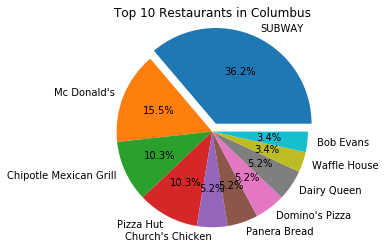

['Pizza Hut', 'SUBWAY', 'Dairy Queen'] are the top 3 populated restaurants in Indianapolis


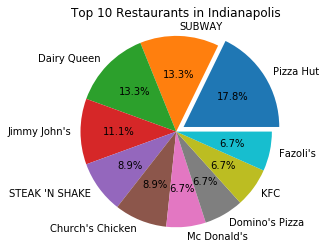

['SUBWAY', 'Chick-Fil-A', "Mc Donald's"] are the top 3 populated restaurants in Birmingham


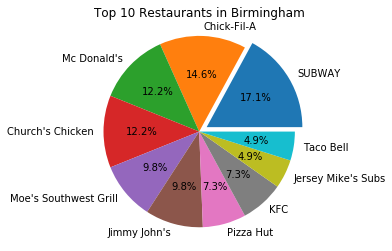

In [294]:
# for each city, let's create the data needed and plot them in pie chart
for city in top3_fastfood_populated_cities:
    counts, labels = create_pie_chart_data(city)
    print(labels[:3], "are the top 3 populated restaurants in", city)
    plot_pie_chart(counts, labels, city)

## Question 7: What's the geospatial perspective of the restaurants in differnt states?

In [295]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [296]:
# create data needed
state_codes = fastfood_data['province'].value_counts().index.tolist()
value_counts_by_states = fastfood_data['province'].value_counts()

# plotly choropleth
data= [dict(type='choropleth',
            locations = state_codes, # Spatial coordinates
            z = value_counts_by_states, # Data to be color-coded
            locationmode = 'USA-states', # set of locations match entries in `locations`
            colorscale = 'Reds',
            marker_line_color = 'white',
            colorbar_title = "Number of Fast Fast Restaurants"
        )]
layout = dict(title = '2019 US Fast Food Restaurants by State', 
              geo = dict(scope='usa'))
iplot(dict(data=data, layout=layout))

### From above choropleth, the interactive visualization shows Ohio(OH), Florida(FL), California(CA), and North Carolina(NC) have the darker red, which indicated there are more restaurants opened in those states than the others.

### The top right corner has no color showed because those states have no fast food resaurants data input.

## Question 8: How are the fast food restaurants scattered?

In [297]:
data = [dict(type = 'scattergeo',
            locationmode = 'USA-states',
            lon = fastfood_data['longitude'],
            lat = fastfood_data['latitude'],
            mode = 'markers',
            marker = dict(size = 3,
                opacity = 0.7,
                reversescale = True,
                autocolorscale = False,
                symbol = 'circle',
                line = dict(width=.5, color='black'),
                color = 'red'
            )
        )]

layout = dict(title = '2019 US Fast Food Restaurants by GPS location',
            geo = dict(scope='usa',
                showland = True,
                landcolor = "rgb(250, 250, 250)",
                subunitcolor = "rgb(217, 217, 217)"
            )
        )
iplot(dict(data=data, layout=layout ))

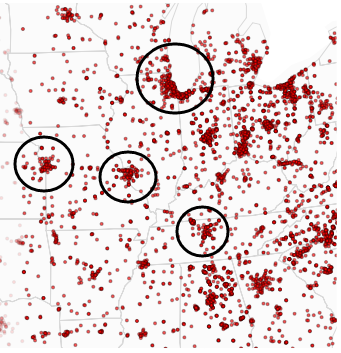

### If you take a look at the above scatter plot, you can see most of fast food restaurants are located in very populated cities and borders of several states.

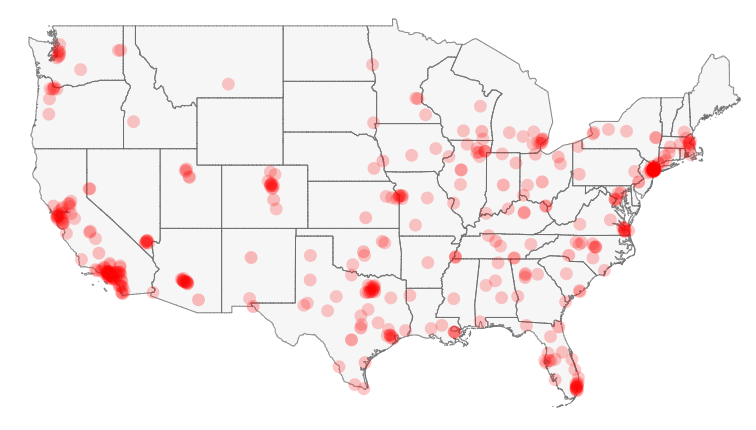

Image from "World Population Review": http://worldpopulationreview.com/countries/united-states-population/

### Comparing the population scatter plot of 2017 US Census data and the scatter plot of our dataset, it's intuitive to see the restaurants are opened in populated areas. That's probably why states like Maine has no fast food restaurant record in the dataset whereas the California region is filled with red dots. 

## 9. Ratio between fast food restaurants opened and population

### input the lastest 2017 US Census Data for each state

In [298]:
# input census data with "|" as separator
us_census_data = pd.read_csv('../input/us-census-2017/US-Census-2017.txt', sep="|", names=["state", "population"])
us_census_data.head()

,state,population
0,California,"39,536,653"
1,Texas,"28,304,596"
2,Florida,"20,984,400"
3,New York,"19,849,399"
4,Pennsylvania,"12,805,537"


## Question 9: Restaurant per person ratio

In [299]:
# we have number of restaurants per state before
value_counts_by_states.head()

OH    922
FL    739
CA    727
NC    663
AL    635
Name: province, dtype: int64

In [314]:
test = int(us_census_data[us_census_data['state']=="California"].iloc[0,1].replace(",",""))
print(test-1)

39536652


In [337]:
# let's divide the population by people in each state
per_capita_count = [None] * len(state_codes)
for i in range(len(state_codes)):
    state = fastfood_data[fastfood_data['province']==state_codes[i]]['province_full'][:1]
    per_capita_count[i] = value_counts_by_states[i] / int(us_census_data[us_census_data['state']=="California"].iloc[0,1].replace(",",""))
per_capita_count[:10]

[2.3320132839772755e-05,
 1.8691516451835214e-05,
 1.8388000623117996e-05,
 1.676924953662618e-05,
 1.606104593628601e-05,
 1.3127059592019587e-05,
 1.0774811919461165e-05,
 1.0218366233479601e-05,
 8.801959032799261e-06,
 8.447857232629176e-06]

In [338]:
# create data needed
state_codes = fastfood_data['province'].value_counts().index.tolist()

# plotly choropleth
data= [dict(type='choropleth',
            locations = state_codes, # Spatial coordinates
            z = per_capita_count, # Data to be color-coded
            locationmode = 'USA-states', # set of locations match entries in `locations`
            colorscale = 'Reds',
            marker_line_color = 'white',
            colorbar_title = "Restaurants opened / population"
        )]
layout = dict(title = 'Ratio between number of fast food Restaurants and population', 
              geo = dict(scope='usa'))
iplot(dict(data=data, layout=layout))

### From the above visualization, the output is consistent with the restaurant per state choropleth. This shows the restaurants are opened based on the populations in each state. That makes sense because restaurants need customers to visit their shops.

### Here is the end of the EDA.
### If you like this kernel, please give me an Up Vote on top by clicking the up arrow.
### Feel free to leave a comment!